#                                   CRICKET SCORE PREDICTOR

### REQUIRED PACKAGES :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### GET THE DATA :

In [2]:
# Importing the dataset
df = pd.read_csv('odi.csv')
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


### EXPLORATORY DATA ANALYSIS :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [4]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


### DATA PRE-PROCESSING :

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for each categorical column
label_encoders = {}

categorical_columns = ["date", "venue", "bat_team", "bowl_team", "batsman", "bowler"]

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [6]:
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,50,19,6,9,520,168,0,0,0.1,0,0,0,0,301
1,1,50,19,6,9,520,168,0,0,0.2,0,0,0,0,301
2,1,50,19,6,9,520,168,4,0,0.3,4,0,0,0,301
3,1,50,19,6,9,520,168,6,0,0.4,6,0,0,0,301
4,1,50,19,6,9,520,168,6,0,0.5,6,0,0,0,301
5,1,50,19,6,9,520,168,6,0,0.6,6,0,0,0,301
6,1,50,19,6,9,242,137,6,0,1.1,6,0,0,0,301
7,1,50,19,6,9,242,137,6,0,1.2,6,0,0,0,301
8,1,50,19,6,9,242,137,6,0,1.3,6,0,0,0,301
9,1,50,19,6,9,242,137,7,0,1.3,7,0,0,0,301


### CORRELATION MATRIX :

In [7]:
df.corr()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.989694,0.019158,0.002156,0.061031,-0.071073,0.002252,0.038262,-0.023003,0.005770,0.065211,-0.003811,0.062887,0.038808,0.117010
date,0.989694,1.000000,0.021021,-0.010525,0.043303,-0.079078,0.002894,0.042827,-0.027762,0.005805,0.073704,-0.005609,0.068668,0.045936,0.134552
venue,0.019158,0.021021,1.000000,-0.014091,-0.045464,-0.007050,0.019840,0.014386,0.005363,0.000166,0.019974,-0.000828,-0.001235,0.013585,0.036831
bat_team,0.002156,-0.010525,-0.014091,1.000000,-0.134542,-0.076228,0.007876,-0.037602,0.010378,-0.006878,-0.041458,0.014297,-0.022916,-0.012906,-0.095310
bowl_team,0.061031,0.043303,-0.045464,-0.134542,1.000000,0.009358,-0.048527,0.016229,-0.034766,0.007492,0.024523,-0.020737,0.029596,0.030858,0.063687
batsman,-0.071073,-0.079078,-0.007050,-0.076228,0.009358,1.000000,-0.008009,-0.018718,-0.015452,-0.023090,-0.008870,-0.003065,-0.000315,0.004151,-0.011787
bowler,0.002252,0.002894,0.019840,0.007876,-0.048527,-0.008009,1.000000,0.009744,-0.011901,0.006050,-0.001637,-0.008581,0.009499,0.008144,0.023742
runs,0.038262,0.042827,0.014386,-0.037602,0.016229,-0.018718,0.009744,1.000000,0.598875,0.931473,0.647093,0.215938,0.572680,0.277120,0.316891
wickets,-0.023003,-0.027762,0.005363,0.010378,-0.034766,-0.015452,-0.011901,0.598875,1.000000,0.756038,0.168192,0.492133,0.067412,-0.172466,-0.304311
overs,0.005770,0.005805,0.000166,-0.006878,0.007492,-0.023090,0.006050,0.931473,0.756038,1.000000,0.496190,0.242566,0.491282,0.208318,0.086654


### VISUALIZE THE DATA - to gain insights

<Axes: >

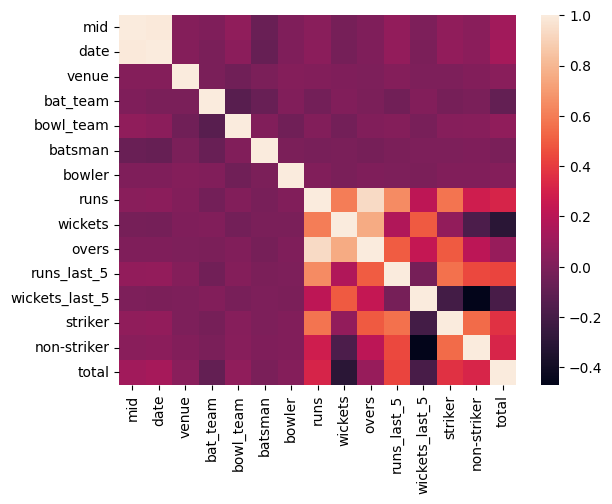

In [8]:
sns.heatmap(df.corr())

### Prepare the data for Machine Learning algorithms

In [9]:
X = df.iloc[:,[7,8,9,12,13]].values
Y = df.iloc[:, 14].values

In [10]:
X

array([[0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
       [4.00e+00, 0.00e+00, 3.00e-01, 0.00e+00, 0.00e+00],
       ...,
       [2.01e+02, 8.00e+00, 4.94e+01, 5.90e+01, 1.80e+01],
       [2.02e+02, 8.00e+00, 4.95e+01, 5.90e+01, 1.80e+01],
       [2.03e+02, 8.00e+00, 4.96e+01, 5.90e+01, 1.80e+01]])

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12345)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### MODEL BUILDING :

In [13]:
def build_lr_model():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)
    return model

In [14]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [15]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    return model

In [16]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()    
    model.fit(x_train, y_train)
    return model

In [17]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    return model

In [18]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    return model

In [19]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    return model

In [20]:
def build_cb_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [21]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

### MODEL EVALUATION

In [22]:
def evaluate_model(model):
    y_true = y_test
    y_pred = model.predict(x_test)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = f"{accuracy_score(y_true,y_pred):.2f}"
    precision = f"{precision_score(y_true,y_pred):.2f}"
    recall = f"{recall_score(y_true,y_pred):.2f}"
    f1 = f"{f1_score(y_true,y_pred):.2f}"

    return accuracy, precision, recall, f1

### MODEL BUILDING :

In [23]:
model_lr = build_lr_model()
model_lr

LinearRegression()

In [24]:
model_knn = build_knn_model()
model_knn

KNeighborsClassifier(n_neighbors=9)

In [25]:
model_dt = build_dt_model()
model_dt

DecisionTreeClassifier()

### MODEL EVALUATION :

In [26]:
y_pred = model_lr.predict(x_test)
score = model_lr.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 52.49923787397193


In [27]:
y_pred = model_knn.predict(x_test)
score = model_knn.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 60.80934739241949


In [28]:
y_pred = model_dt.predict(x_test)
score = model_dt.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 71.48361356511826


### Testing with a custom input

In [29]:
### input - (runs ,wickets, overs, striker_runs, Non-stricker_runs )

new_prediction = model_dt.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [269]


### SAVE THE MODEL :

In [30]:
with open('./ODI_SCORE_lr_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

In [31]:
with open('./ODI_SCORE_knn_model.pkl', 'wb') as file:
    pickle.dump(model_knn, file)

In [32]:
with open('./ODI_SCORE_dt_model.pkl', 'wb') as file:
    pickle.dump(model_dt, file)